In [1]:
# Multiple Linear Regression

In [2]:
# Formula:
# y = b0 + b1x1 + b2x1^2 + b3x1^3 + ..... + bnx1^n

In [3]:
# Used in carabolic curve
# y and x are non linear, but model is named linear since coefficients are linear

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Position_Salaries.csv")

In [6]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [7]:
X = df.iloc[:,1:-1]
y = df.iloc[:, -1].values

In [8]:
print(X)

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10


In [9]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [10]:
# First making a simple linear regression model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [13]:
print(X_train)
print(y_train)

   Level
4      5
9     10
1      2
6      7
7      8
3      4
0      1
5      6
[ 110000 1000000   50000  200000  300000   80000   45000  150000]


In [14]:
regressor = LinearRegression()

In [15]:
regressor.fit(X,y)

LinearRegression()

In [16]:
y_pred_linear = regressor.predict(X_test)
print(y_pred_linear)

[ 47303.03030303 532575.75757576]


In [17]:
# Now making a polynomial linear regression model

In [38]:
from sklearn.preprocessing import PolynomialFeatures # to work on x1 
poly = PolynomialFeatures(degree = 2) # uptox1^2
X_poly = poly.fit_transform(X)

In [44]:
print(X_poly) # will show x1^0, xx1^1, x1^2(since degree 2 is taken as n

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [46]:
poly_reg = LinearRegression() # Using Linear Regression model to train the polynomial x1 values
poly_reg.fit(X_poly, y) # y train is not used since it is small

LinearRegression()

In [48]:
# Now we need to display the data

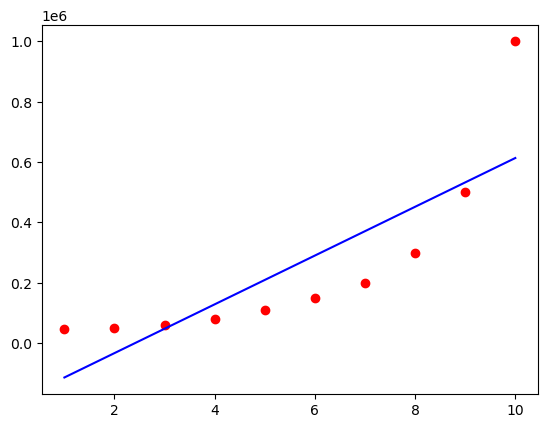

In [70]:
plt.scatter(X, y, color = 'red') # Plotting real results
plt.plot(X, regressor.predict(X), color = 'Blue') # Plotting results from linear regression model made first
plt.show()

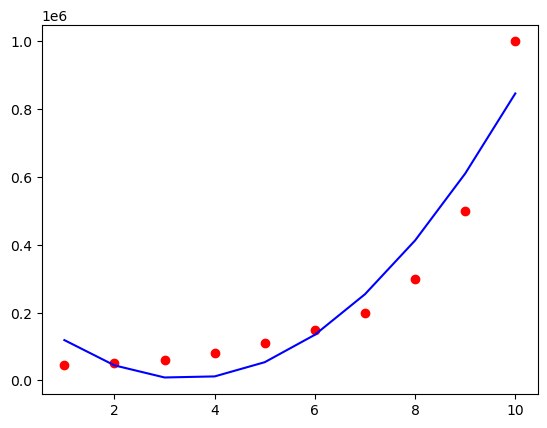

In [72]:
# Now plotting the predicted data from poly reg model against actual data
plt.scatter(X,y, color = 'red')
plt.plot(X, poly_reg.predict(X_poly), color = 'blue')
plt.show()

In [74]:
# Above is degree(n) = 2, powers can be made higher

In [96]:
poly_reg_new = LinearRegression() # New instance of LR class made
poly_new = PolynomialFeatures(degree = 4) # calculating upto x1^4 from x1^0
X_poly_new = poly_new.fit_transform(X) # Fitting the data to calculate till x1^4
print(X_poly_new)
poly_reg_new.fit(X_poly_new, y) # Making the model using new x1 values and y value to be predicted

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


LinearRegression()

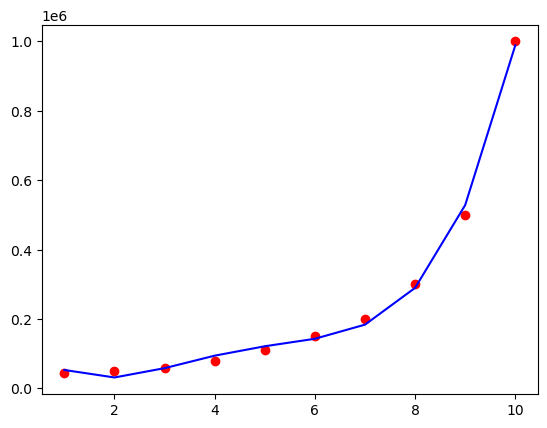

In [98]:
plt.scatter(X,y, color = 'red')
plt.plot(X, poly_reg_new.predict(X_poly_new), color = 'blue')
plt.show()

In [108]:
# Now predicting the salaries using Linear regression
lin_prediction = regressor.predict([[6.5]])
# 2 Square brackets means 2 dimensions, 1st being rows and 2nd being columns
print(lin_prediction)

[330378.78787879]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [112]:
# As per data he should have near 150k - 200k salary but output shows as 33k

In [136]:
# Predicting Polynomial Regression
poly_pred = poly_reg_new.predict(poly_new.transform([[6.5]]))
# poly_reg_new is the model and poly_new is the transformed values of x1^n
print(poly_pred)

[158862.45265152]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
